In [18]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy
import matplotlib.pyplot as plt
import numpy as npo

In [19]:
def circuit(circuit_param):
    qml.RY(circuit_param, wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)

In [20]:
def state_purity(angle, phase, circuit_param, noise_param):

    """
    This function returns the purity of the output state after adding noise
    to the given circuit().

    Args:
        angle (float): The angle theta that parametrizes the initial quantum state
        phase (float): The phase phi that parametrizes the initial quantum state
        circuit_param (float): The angle that paramterizes the RY rotation in circuit(alpha)
        noise_param (float): The angle that paramterizes the CRX gate in the circuit modelling the noise

    Returns:
        (float): Purity of the state after going through the noisy circuit
    """

    def noise(noise_param, wires):

        """Implements the circuit that models the noise added after each gate. Do not return anything."""

        # Put your code here #

    dev = qml.device("default.mixed", wires=2)

    @qml.qnode(dev)
    def noisy_circuit(angle, phase, circuit_param, noise_param):

        """Implements transformed circuit with state preparation at the beginning, and noise inserted
        after each gate.

        Returns: Whatever is useful for you to calculate the purity!"""

        # Put your code here #
        # Don't forget to prepare the initial state
        # If you use a quantum transform to add noise, use it within this circuit

    # Feel free to add here any code or helper functions, if you need them.

    return  # Return the purity in terms of the calculated expectation values.

In [21]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = state_purity(*ins)

    return str(np.real_if_close(output))

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises:
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your calculated purity isn't quite right."

In [22]:
test_cases = [['[0.1,0.2,0.3,0.4]', '0.9647'], ['[0.5,0.3,0.5,0.7]', '0.928356']]

Running test case 0 with input '[0.1,0.2,0.3,0.4]'...


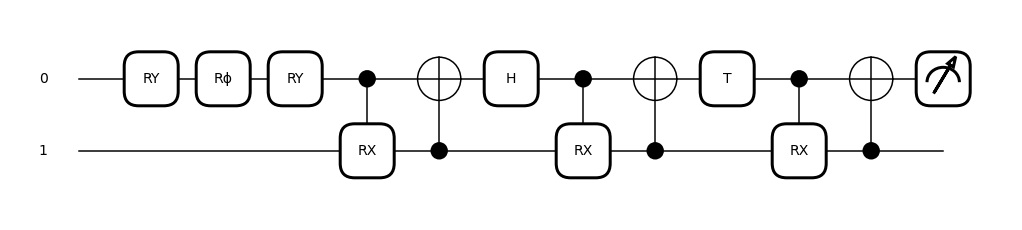

Correct!
Running test case 1 with input '[0.5,0.3,0.5,0.7]'...


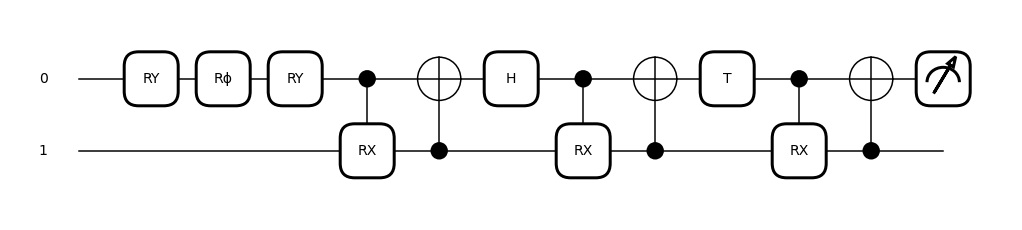

Correct!


In [25]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")
        else:
            print("Correct!")

My implementation - 

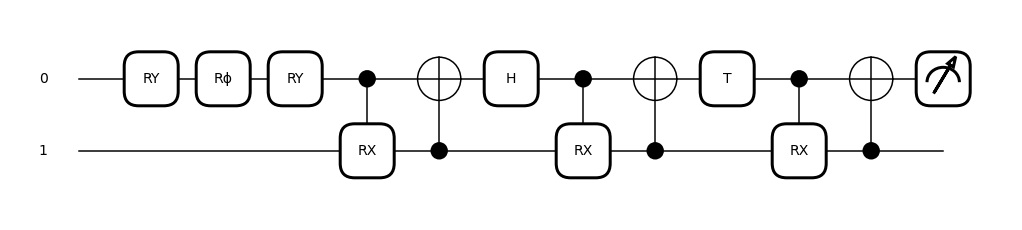

result = (0.9677808290535496+0j)


In [24]:
def state_purity(angle, phase, circuit_param, noise_param):
    
    def noise(noise_param,wires):
        qml.CRX(noise_param, wires = [0,1])
        qml.CNOT(wires = [1,0])
        
    dev = qml.device("default.mixed", wires=2)
    
    def state_preparation(angle, phase):
        qml.RY(angle, wires = 0)
        qml.PhaseShift(phase, wires = 0)
    
    @qml.transforms.insert(noise, [noise_param], position="all")
    def circuit(circuit_param):
        qml.RY(circuit_param, wires = 0)
        qml.Hadamard(wires = 0)
        qml.T(wires = 0)
        
    def trace(rho):
        npRho = np.array(rho)
        Tr = 0
        for i in range(2):
            for j in range(2):
                Tr += npRho[i][j]*np.conj(npRho[i][j])
        return Tr
    
    @qml.qnode(dev)
    def noisy_circuit(angle, phase, circuit_param, noise_param):
        state_preparation(angle, phase)
        circuit(circuit_param)
        return qml.density_matrix(0)
    
    qml.drawer.use_style('black_white')
    fig, ax = qml.draw_mpl(noisy_circuit)(angle, phase, circuit_param, noise_param) 
    plt.show()
    
    rho = noisy_circuit(angle,phase,circuit_param, noise_param)
    return trace(rho)


angle = np.pi/4
phase = np.pi/3
circuit_param = np.pi/3
noise_param = np.pi/4

result = state_purity(angle, phase, circuit_param, noise_param)
print(f"result = {result}")